# Восстановление золота из золотосодержащей руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

In [6]:
df_train = df_train.dropna(subset= (['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au', 'rougher.output.recovery']))

In [7]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
df_train['rougher.output.recovery_calculate'] = (C*(F-T)) / (F*(C-T)) * 100

In [8]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calculate'])
print('Средняя абсолютная ошибка = ', mae)

Средняя абсолютная ошибка =  9.444891926100695e-15


Средняя абсолютная ошибка крайне мала, рассчитанные данные очень близки к значениям признака.

In [9]:
for column in df_train.columns:
    if column not in  df_test.columns:
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке нет следующих признаков:
 1. Финальной характеристики параметров продукта.
 2. Параметров продукта первичной очистки.
 3. Расчетные характеристики флотаци.
 4. Параметров продукта флотации.
 5. Параметров продукта вторичной очистки.
 Т.е. в тестовой выборке отсутствуют все параметры продукта и расчетные характеристики.

## Предобработка данных.

In [10]:
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

def drop_target_na(df):
    print("Количетсво пропусков в rougher.output.recovery", df['rougher.output.recovery'].isna().sum())
    print("Количетсво пропусков в final.output.recovery", df['final.output.recovery'].isna().sum())
    df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
    print("Пропуски удалены")
drop_target_na(df_test)
drop_target_na(df_train)

Количетсво пропусков в rougher.output.recovery 546
Количетсво пропусков в final.output.recovery 442
Пропуски удалены
Количетсво пропусков в rougher.output.recovery 0
Количетсво пропусков в final.output.recovery 138
Пропуски удалены


In [11]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [12]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

Удалили дубликаты и пропуски из целевых признаков. Пропуски в нецелевых признаках заполнили методом ffill.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
тут чуть больше сделали - дополнили тестовую выборку... хорошо)

# 2. Анализ данных

In [13]:
rougher_output_concentrate = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                                    'rougher.output.concentrate_au']]
primary_cleaner_output_concentrate = df_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                                           'primary_cleaner.output.concentrate_au']]
final_otput_concentrate = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                                'final.output.concentrate_au']]

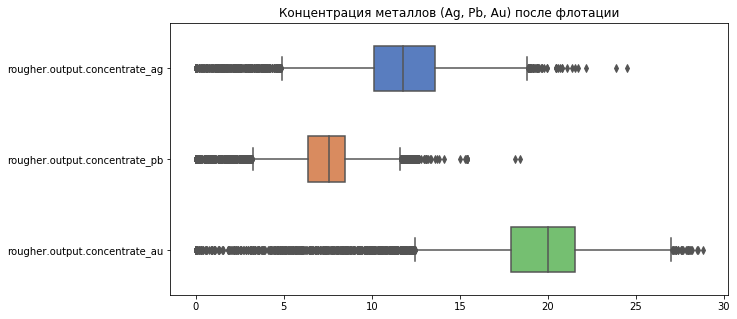

In [14]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=rougher_output_concentrate, orient="h", palette="muted", width=0.5).set_title('Концентрация металлов (Ag, Pb, Au) после флотации')

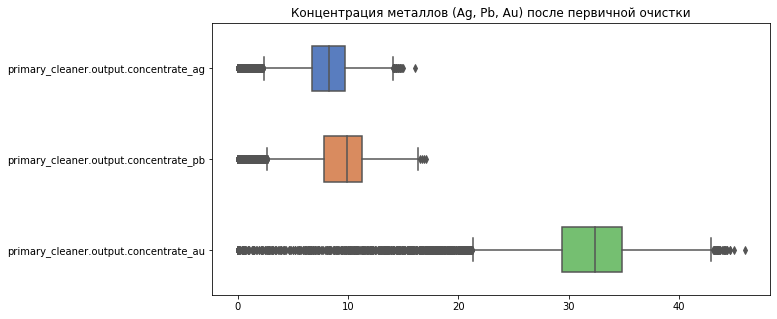

In [15]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=primary_cleaner_output_concentrate, orient="h", palette="muted", width=0.5).set_title('Концентрация металлов (Ag, Pb, Au) после первичной очистки')

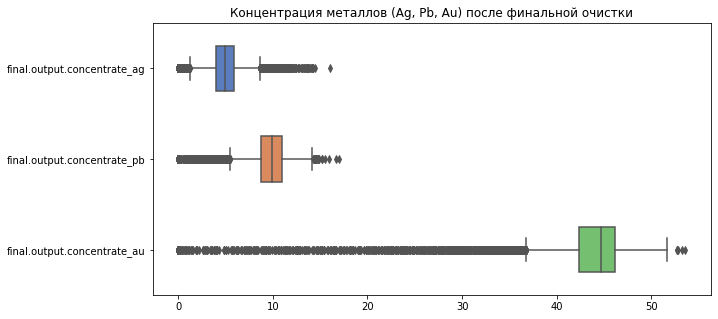

In [16]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=final_otput_concentrate, orient="h", palette="muted", width=0.5).set_title('Концентрация металлов (Ag, Pb, Au) после финальной очистки')

Концентрация золота с каждой последующей очисткой значительно растет, концентрация серебра слегка снижается, а концентрация свинца отличается несильно.

## Распределения размеров гранул сырья

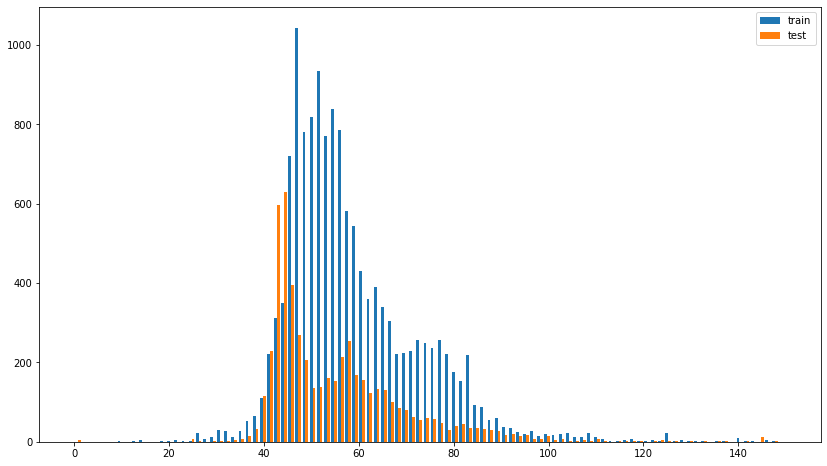

In [17]:
plt.figure(figsize=(14,8))
plt.hist([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']],
         bins = 100, label=['train', 'test'], range=(0,150))
plt.legend()
plt.show()

Распределения размеров гранул сырья на обучающей и тестовой выборках отличаются незначительно.

## Cуммарная концентрация всех веществ на разных стадиях

In [18]:
df_train['rougher.output.concentrate_all'] = (
    df_train['rougher.output.concentrate_ag']
    + df_train['rougher.output.concentrate_pb']
    + df_train['rougher.output.concentrate_au']
    + df_train['rougher.output.concentrate_sol']
)

In [19]:
df_train['primary_cleaner.output.concentrate_all'] = (
    df_train['primary_cleaner.output.concentrate_ag']
    + df_train['primary_cleaner.output.concentrate_pb']
    + df_train['primary_cleaner.output.concentrate_au']
    + df_train['primary_cleaner.output.concentrate_sol']
)

In [20]:
df_train['final.output.concentrate_all'] = (
    df_train['final.output.concentrate_ag']
    + df_train['final.output.concentrate_pb']
    + df_train['final.output.concentrate_au']
    + df_train['final.output.concentrate_sol']
)

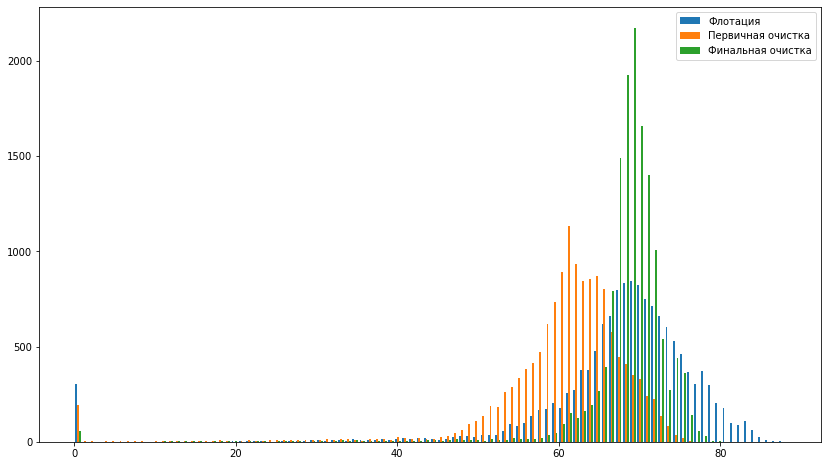

In [21]:
plt.figure(figsize=(14,8))
plt.hist([df_train['rougher.output.concentrate_all'], 
          df_train['primary_cleaner.output.concentrate_all'],
          df_train['final.output.concentrate_all']], bins = 100, 
          label=['Флотация','Первичная очистка', 'Финальная очистка'])
plt.legend()
plt.show()

На графике видны выбросы, близкие к значению 0. Избавимся от них, чтобы избежать искажения даных.

In [22]:
df_train = df_train[
    (df_train['rougher.output.concentrate_all'] > 0.1) & 
    (df_train['primary_cleaner.output.concentrate_all'] > 0.1) & 
    (df_train['final.output.concentrate_all'] > 0.1)]

# 3. Модель

In [23]:
def smape(targets, predictions):
    formula = (abs(targets - predictions)/((abs(targets) + abs(predictions)) / 2))   
    formula *= 100
    smape_all =  formula.sum()
    
    rougher = smape_all['rougher.output.recovery'] / len(formula)
    final = smape_all['final.output.recovery'] / len(formula)
    
    return (0.25 * rougher) + (0.75 * final)

In [24]:
target_columns = ['rougher.output.recovery', 'final.output.recovery']
feature_columns = df_test.columns.drop(labels=target_columns)
features = df_train[feature_columns]
target  = df_train[target_columns]
features_test = df_test[feature_columns]
target_test = df_test[target_columns]

In [25]:
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]
featuers_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [26]:
def cross_val(model, features, target):
    final_score = cross_val_score(model, features, target, cv=5, scoring=score)
    return final_score.mean()

In [27]:
def find_best_params(model, parameters, verbose=True):
    gridParams = ParameterGrid(parameters)
    
    best_score = None
    best_params = None
        
    for params in gridParams:
        train_model = clone(model)
        train_model.set_params(**params)
        score = cross_val_score(train_model, features, target, cv=5, scoring=make_scorer(smape))
        
        if verbose:
            print('smape =', score.mean(), 'параметры', params)
        
        if (best_params == None) or (score.mean() < best_score.mean()): 
            best_score = score
            best_params = params

    print()
    
    print('Лучшие параметры:', best_params)
    print('Лучшее значение smape:', best_score.mean())
    
    return best_params, best_score

In [28]:
%%time

parameters = {"normalize": [False, True]}
linear_regression = find_best_params(LinearRegression(), parameters)

smape = 10.07914075512679 параметры {'normalize': False}
smape = 10.07914075512679 параметры {'normalize': True}

Лучшие параметры: {'normalize': False}
Лучшее значение smape: 10.07914075512679
CPU times: user 1.79 s, sys: 1.14 s, total: 2.93 s
Wall time: 2.94 s


In [29]:
%%time

model = DecisionTreeRegressor(random_state=123)
parameters = {
    'max_depth':  [x for x in range(2, 26, 5)],
    'min_samples_split': [x for x in range(2, 6)],
    'min_samples_leaf': [x for x in range(2, 6)]}
decision_tree = find_best_params(model, parameters, verbose=False)


Лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшее значение smape: 9.434739801080795
CPU times: user 4min 10s, sys: 130 ms, total: 4min 10s
Wall time: 4min 11s


In [30]:
%%time

model = RandomForestRegressor(random_state=123)
parameters = {
    'n_estimators':  [x for x in range(5, 100, 15)],
    'max_depth': [x for x in range(2, 10, 4)]}
random_forest = find_best_params(model, parameters)

smape = 9.103242626801691 параметры {'max_depth': 2, 'n_estimators': 5}
smape = 9.08222048650067 параметры {'max_depth': 2, 'n_estimators': 20}
smape = 9.081949001439165 параметры {'max_depth': 2, 'n_estimators': 35}
smape = 9.053310607491154 параметры {'max_depth': 2, 'n_estimators': 50}
smape = 9.057673593015034 параметры {'max_depth': 2, 'n_estimators': 65}
smape = 9.07115335064827 параметры {'max_depth': 2, 'n_estimators': 80}
smape = 9.071259505845024 параметры {'max_depth': 2, 'n_estimators': 95}
smape = 9.050143232099794 параметры {'max_depth': 6, 'n_estimators': 5}
smape = 8.990088158861814 параметры {'max_depth': 6, 'n_estimators': 20}
smape = 9.037579290914469 параметры {'max_depth': 6, 'n_estimators': 35}
smape = 9.047657610421687 параметры {'max_depth': 6, 'n_estimators': 50}
smape = 9.06655843552141 параметры {'max_depth': 6, 'n_estimators': 65}
smape = 9.088110902572106 параметры {'max_depth': 6, 'n_estimators': 80}
smape = 9.168664942139456 параметры {'max_depth': 6, 'n_

Наименьшее smape получили при использовании RandomForestRegressor с параметрами 'max_depth': 6, 'n_estimators': 20.

## Тестирование лучшей модели

In [44]:
model_best = RandomForestRegressor(random_state=123, max_depth= 6, n_estimators= 20)
model_best.fit(features, target)
predictions = model_best.predict(features_test)
smape_best_model = smape(target_test, predictions)
print('smape на лучшей модели = ',smape_best_model)

from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='uniform')
dummy_model.fit(features_train, target_train)
dummy_predictions = dummy_model.predict(features_test) 
smape_dummy = smape(target_test, dummy_predictions)
print('smape на константной модели = ', smape_dummy)

if smape_dummy > smape_best_model:
    print('Проверка на адекватность пройдена')
else:
    print('Проверка на адекватность не пройдена')

smape на лучшей модели =  9.383150311885295
smape на константной модели =  14.197608184519606
Проверка на адекватность пройдена


## Вывод

В ходе проекта была выполнена предобработка данных, была вычислена эффективность обогащения. Была исследована концентрация металлов на различных этапах очистки, а также суммарная концентрация всех веществ на разных стадиях.
Так же мы вычислили итоговую sMAPE и обучили различные модели, проверяя их качество кросс-валидацией. Самой удачной оказалась модель RandomForestRegressor с параметрами max_depth= 6, n_estimators= 20.

Добавила smape для лучшей модели и сравнила его со smape для константной модели. Smape для лучшей модели меньше, чем для случайной. Что и требовалось доказать!